<a href="https://colab.research.google.com/github/jplavorr/Data-Science/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://i.postimg.cc/zXN3DHM3/Captura-de-tela-2021-04-22-145652.png">

#### **Data Science & Machine Learning**
*by [João Pedro Lavor](https://www.linkedin.com/in/jo%C3%A3o-pedro-lavor-65162312b/)*  

---

Entender por que seus clientes abandonam o seu produto ou serviço é vital para conquistar um crescimento sustentável. Como o Churn tem um efeito negativo na receita de uma empresa, entender o que é esse indicador e como trabalhar para mitigar essa métrica é algo crítico para o sucesso de muitos negócios.

Neste post, vamos explorar o que é o churn e o que seria uma boa métrica de churn rate. Também apresentaremos algumas formas para evitar que seus clientes abandonem o barco solicitando o cancelamento.

#Churn Prediction para uma empresa de Telecomunicações

suponha que um cliente faz uso de seus serviços com certa frequência. E, de repente, deixa de usá-los e abandona sua empresa. As principais perguntas a serem feitas são: Por que isso acontece? Como reverter essa situação? Como melhorar identificar esses clientes?

Nesses momentos, ter um arsenal de dados sobre o consumidor, além de conseguir analisá-los, transformá-los em informações e extrair insights delas, faz toda a diferença.

 **Churn Rate**, ou simplesmente churn, representa a taxa de evasão da sua base de clientes. No primeiro capitulo do livro '*Data Science para Negócios*', um dos problemas que ele aborda é o uso de dados em prol de tentar impedir a rotatividade de clientes de uma determinada empresa. Atrair novos clientes é mais caro do que manter os que já existem, por isso, empresas tem que procurar investir em marketing para evitar rotatividade. *Churn* pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Data Science entra para decidir quais clientes irão receber a oferta antes dos termino dos seus contratos. Nesse artigo, irei construir um modelo de Machine Learning que foca justamente nesse problema para uma empresa de telecomunicações, aonde iremos tentar identificar a partir da base de dados, quais clientes em termino de contrato estão mais propensos a cancelarem o serviço da empresa.

<p align=center>
<img src="https://miro.medium.com/max/800/0*dzmm3qresODlScte" width="60%"></p>

Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas. Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [118]:
# instalar Pandas Profiling
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [176]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [175]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# random seed
np.random.seed(42)

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')
%matplotlib inline


In [120]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Acima, temos uma visão das 5 primeiras entradas do nosso conjunto de dados. Atráves de uma breve olhada, podemos ver que os dados representam informações de serviços e pagamentos dos clientes. Mesmo que não tendo descrição exata das variáveis, é possível ter uma noção do que se tratam, pois são serviços padrões de uma empresa de telecomunicações.

In [121]:
print("Número de Entradas:",df.shape[0])
print("\nNúmero de Colunas:",df.shape[1])

Número de Entradas: 7043

Número de Colunas: 21


Como se verifica acima, o dataset é composto de 7043 entradas e 21 variáveis.

#Análise Exploratória de Dados

Sempre antes de começar a treinar seu modelo de Machine Learning, temos que fazer uma análise nos dados presentes na tabela para verificar sua integridade, em prol de descobrir se é preciso ser feita alguma limpeza ou mudança nas variáveis presente nos dados.

In [122]:
print("Número máximo de dados ausentes no DataSet:",df.isnull().sum().max())
print("\nTipo das Variáveis presentes no DataSet:",df.dtypes)
print('\nValores únicos por variável:', df.nunique())
print("\nNome das variáveis:", df.columns.values)

Número máximo de dados ausentes no DataSet: 0

Tipo das Variáveis presentes no DataSet: customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Valores únicos por variável: customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
Devic

Acima, verificamos as seguintes informações:
* Dados ausentes:
    * A soma dos dados ausentes presentes em todas as variáveis igual a zero, o que indica que não há dados ausentes presente.  

* Tipo das Variáveis:
  * As features são compostas em sua maioria por variáveis categóricas.
  * A coluna `TotalCharges` é uma variável númerica sem dados ausentes, mas está sendo apresentada como `string`. 
  * Mais a frente, iremos passar as features categóricas para valor numérico.
  * A nossa **variável alvo** se encontra na coluna `Churn`, que indica a quantidade de clientes que encerraram o serviço no anterior.
  * A coluna `customerID` não agrega no treinamento do modelo, portante ela será retirada posteriormente.






###Proporção de Churn
É muito importante saber como nossa variável alvo `Churn` está distribuida.   

Proporção de Churn da Empresa: 0.2653698707936959


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

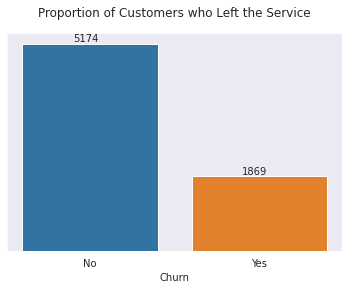

In [123]:
#Proporção de Churn na empresa
print("Proporção de Churn da Empresa:",df['Churn'].value_counts()[1]/df.shape[0])
x = ['No', 'Yes']
y = [df['Churn'].value_counts().values[0], df['Churn'].value_counts().values[1]]
fig, ax = plt.subplots()
#ax = plt.gca()
ax.set_xlabel('Churn')
#Deixar o eixo y invisivel 
ax.get_yaxis().set_visible(False)
ttl = ax.title
ttl.set_position([.5, 1.05])
#plt.draw()
sns.countplot(df['Churn'], ax=ax)
ax.set_title('Proportion of Customers who Left the Service')
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    plt.annotate(y[i], (-0.1 + i, y[i] + j))


plt.plot()

A empresa em questão se encontra com uma Taxa de Churn de 26.53%. Portanto, estamos lidando com um DataSet desbalanceado. A quantidade de Churns é significativamente menor do que as não Chruns.

Retornando a situação da coluna `TotalCharges`, iremos ver, como é possível identificar o erro presente nela. Ao tentarmos usar a mudança de variável `pd.to_numeric(df['TotalCharges'])`, encontramos um erro, informando que existe uma string vazia (" ") presente na coluna. Vamos agora identificar quantas dessas strings estão presentes e contornar esse problema.*texto em itálico*

In [124]:
#Verificando quantas linhas possuem a string vazia.
print("O número de entradas como string vazias são:",df[df['TotalCharges']==' '].shape[0])

O número de entradas como string vazias são: 11


Temos 11 linhas com as strings vazias presentes na coluna `TotalCharges`. Para alterar isso, iremos construir uma função para aplicar na coluna alvo e alterar as strings vazias para valores `NaN`. 

Iremos logo fazer uma cópia desse DataSet para efetuar essa limpeza e excluir a coluna `customerID` que não está agregando a nossa análise.

In [125]:
def conversor_str_float(column):
  if column == ' ':
    #converte cada string vazia para NaN
    return np.nan
  else:
    #converte cada entrada para float
    return float(column)

In [126]:
#Criando uma Cópia do DataSet
df_clean = df.copy()
#Dropar Coluna CustomerID
df_clean.drop('customerID', axis=1, inplace=True)
#Aplicando a função a coluna TotalCharges
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(conversor_str_float)
#Verificando tipo da coluna Totalcharges
print(df_clean['TotalCharges'].dtypes)

float64


Agora que passamos a coluna `TotalCharges` para float, temos que lidar com  os dados ausentes que inserimos na coluna. Temos duas opções:

  * Retirar as respectivas linhas com valores NaN.
  * Substituir os valores NaN pela mediana da coluna.

Iremos prosseguir substituindo os valores pela mediana da coluna, pois a coluna `TotalCharge` pode ser uma variável de importância para nosso treinamento.  

Iremos prosseguir retirando os valores da coluna, pois a coluna `TotalCharge`, pois os valores da coluna `Churn` relacionados a ele apresentam valores `no`. Portanto, fazem parte da classe majoritária dos valores de `Churn`, logo não irá interferir no treinamento. 

In [127]:
#Substituindo valores pela Mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

In [128]:
#Dropando Valores
#df_clean['TotalCharges'].dropna(inplace= True)

Agora que todas nossas colunas estão sem valores ausentes e nos seus tipos corretos. Podemos começar a olhar para distribuição dos nossos dados ao tentar entender como eles estão se comportando. Isso pode vir a ajudar futuramente como otimizar o treinamento do nosso modelo de machine larning. 

Por mais que a maioria das nossas variáveis ainda estão na sua forma binária ou categórica, podemos usar o método `describe` para olhar os valores estatísticos das variáveis númericas presentes.

In [129]:
#Valores estatisticos
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Podemos notar:
* Na coluna `SeniorCitizen` mostra que 75% dos clientes não são idosos.

* Na coluna `tenure` vemos que 25% dos clientes permaneceram até 9 meses com a empresa.

Mais importante, não há indícios de outliers presentes nas variáveis numéricas. Com os boxplots abaixo, podemos ter uma certeza de que não há outliers presentes nas variáveis `MonhtlyCharges` e `TotalCharges`.

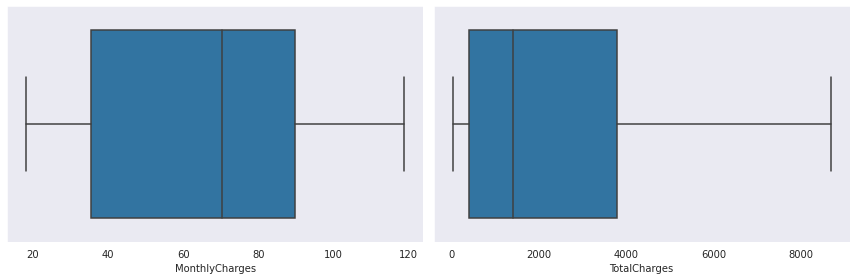

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(x='MonthlyCharges', data=df_clean, ax=ax[0])
sns.boxplot(x='TotalCharges', data=df_clean, ax=ax[1])
plt.tight_layout()

A coluna `TotalCharges` é o pagamento mensal `MonthlyCharges` multiplicado pelo número de meses que o clientes está na empresa `tenure`. Portanto, essa coluna não agrega valor ao nosso algoritmo e podemos dropa-lá.



In [131]:
#Dropando a coluna TotalCharges
df_clean.drop('TotalCharges', axis=1, inplace = True)

Já a coluna `tenure`, representa o tempo (em meses) em que o cliente usa/usou o determindo serviço da empresa. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


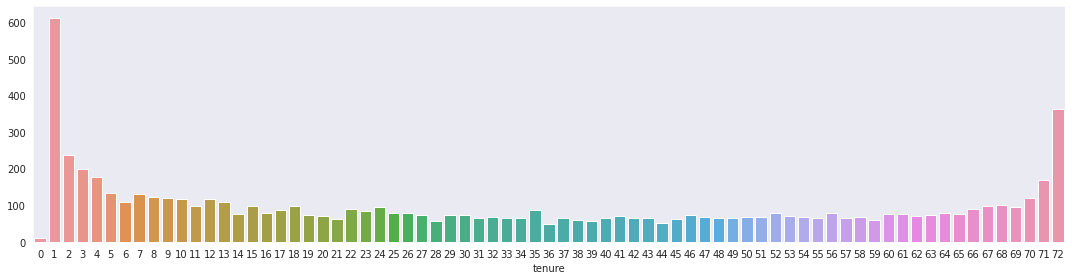

In [132]:
fig, ax = plt.subplots(figsize=(15,4))
sns.countplot(df_clean['tenure'])
#sns.distplot(df["tenure"],ax=ax)
plt.ylabel('')
plt.tight_layout();

Observamos que na coluna `tenure`, costa o valor 0 em meses, que representa os clientes que acabaram de assinar o serviço.

In [133]:
df_clean[df_clean['tenure']==0]['Churn'].value_counts()

No    11
Name: Churn, dtype: int64

Vemos que temos um total de 11 clientes que acabaram de assinar o serviço da empresa, logo nenhum deles vai ser taxado como churn. Portanto, iremos retirar esses valores do nosso Dataset, pois ele pode dar uma falsa confiança para variáeis que posteriormente podem ser forte indicadoras de Churn.

In [134]:
#Retirando tenure com valores iguais a zero
df_clean = df_clean[df.tenure != 0]

#Lidando com Variáveis Categóricas
É muito comum ver variáveis categóricas em um conjunto de dados. No entanto, nosso algoritmo de Machine Learning só pode ler valores numéricos. É essencial para o modelo transformar recursos categóricos em valores numéricos. 

Mas antes de fazer essa transformação, vamos entender as nossas variáveis categóricas. Elas estão divididas em dois tipos, as binárias(dois valores de resposta) e não binárias(mais de dois valores de resposta) vamos olhar os valores únicos entre elas.

In [135]:
#Valores categoricos Unicos
binary_categorical_values = [] 
multiple_categorical_values =[]
for col in df_clean.select_dtypes('object').columns:
    if df_clean[col].value_counts().shape[0] == 2:
        binary_categorical_values.append(col)
    else:
        multiple_categorical_values.append(col)

print("Variaveis categoricas com dois valores:", binary_categorical_values)
print("\nVariáveis Categóricas com Mais de dois Valores:", multiple_categorical_values)

Variaveis categoricas com dois valores: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Variáveis Categóricas com Mais de dois Valores: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


##Variáveis Categóricas Binárias

Para ter uma ideia de como estão as proporções dessas variáveis binárias, vamos fazer uso do gráfico de barra. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

[]

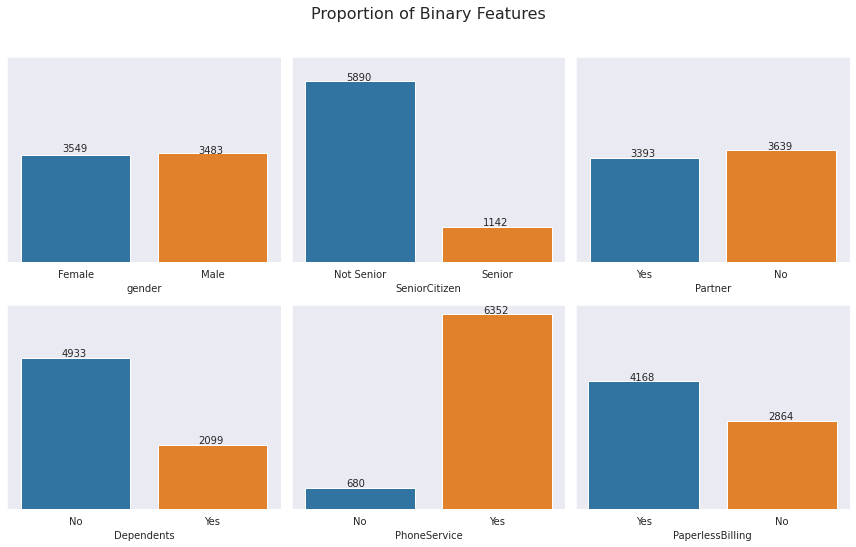

In [136]:
#Creating the Multiple Plot
fig, ax = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
#Figure Title
fig.suptitle('Proportion of Binary Features', fontsize=16,y=1.08)


#Column Plot [0,0]
sns.countplot(df_clean["gender"], ax=ax[0,0])
x = ['Female', 'Male']
y = [df_clean['gender'].value_counts().values[0], df_clean['gender'].value_counts().values[1]]
ax[0,0].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,0].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [0,1]   
sns.countplot(df_clean["SeniorCitizen"], ax=ax[0,1])
x = ['Not Senior', 'Senior']
y = [df_clean['SeniorCitizen'].value_counts().values[0], df_clean['SeniorCitizen'].value_counts().values[1]]
ax[0,1].get_yaxis().set_visible(False)
#Change X ticks
ax[0,1].set_xticklabels(['Not Senior', 'Senior'])
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,1].annotate(y[i], (-0.1 + i, y[i] + j))

#column Plot [0,2]
sns.countplot(df_clean["Partner"], ax=ax[0,2])
x = ['Yes', 'No']
y = [df_clean['Partner'].value_counts().values[1], df_clean['Partner'].value_counts().values[0]]
ax[0,2].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,2].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,0]
sns.countplot(df_clean["Dependents"], ax=ax[1,0])
x = ['No', 'Yes']
y = [df_clean['Dependents'].value_counts(ascending=True).values[1], df_clean['Dependents'].value_counts(ascending=True).values[0]]
ax[1,0].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,0].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,1]
sns.countplot(df_clean["PhoneService"], ax=ax[1,1])
x = ['No', 'Yes']
y = [df_clean['PhoneService'].value_counts().values[1], df_clean['PhoneService'].value_counts().values[0]]
ax[1,1].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,1].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,2]
sns.countplot(df_clean["PaperlessBilling"], ax=ax[1,2])
x = ['Yes', 'No']
y = [df_clean['PaperlessBilling'].value_counts().values[0], df_clean['PaperlessBilling'].value_counts().values[1]]
#Remove y-axis
ax[1,2].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,2].annotate(y[i], (-0.1 + i, y[i] + j))
    
plt.tight_layout()
plt.plot()

Há um grande desequilíbrio nas variáveis ​​`SeniorCitizen` e `PhoneService`. A maioria dos clientes são jovens e da mesma forma, a maioria dos clientes possuem um serviço de telefone.

É melhor verificar como a variável de destino (churn) muda de acordo com os recursos binários. Para poder fazer cálculos, precisamos alterar os valores da variável de destino.


Para checar como a variável `Churn` está distribuída entre essas variáveis categóricas. Para isso, precisamos transformá-la em uma variável numérica. vamos denotar: `Yes - 1` e `No - 0` 

In [137]:
#Mudando a variável categorica para numerica
df_clean['Churn'].replace({'Yes':1, 'No':0}, inplace=True)

Agora temos que notar o seguinte. Todos os clientes que deixaram a empresa (No caso, Churn) foram denotados pelo valor numérico 1, com isso, se tirarmos a média de toda coluna `Churn`, será somado apenas os valores iguais a 1 e será dividio pelo número total de valures na coluna, isso é exatamente a porcentagem de clientes `Churn` (ou seja, de valores iguais a 1 na coluna) da empresa. Dessa forma, podemos contabilizar entre as variáveis categóricas, qual a porcentagem de Churn.   

In [138]:
print('Proporção de Churn para coluna gender:')
print(df_clean[['gender','Churn']].groupby(['gender']).mean())
print('\nProporção de Churn para coluna SeniorCitizen:')
print(df_clean[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print('\nProporção de Churn para coluna Partner: ')
print(df_clean[['Partner','Churn']].groupby(['Partner']).mean())
print('\nProporção de Churn para coluna Dependents: ')
print(df_clean[['Dependents','Churn']].groupby(['Dependents']).mean())
print('\nProporção de Churn para coluna PhoneService: ')
print(df_clean[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print('\nProporção de Churn para coluna PaperlessBilling: ')
print(df_clean[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())

Proporção de Churn para coluna gender:
           Churn
gender          
Female  0.269595
Male    0.262046

Proporção de Churn para coluna SeniorCitizen:
                  Churn
SeniorCitizen          
0              0.236503
1              0.416813

Proporção de Churn para coluna Partner: 
            Churn
Partner          
No       0.329761
Yes      0.197171

Proporção de Churn para coluna Dependents: 
               Churn
Dependents          
No          0.312791
Yes         0.155312

Proporção de Churn para coluna PhoneService: 
                 Churn
PhoneService          
No            0.250000
Yes           0.267475

Proporção de Churn para coluna PaperlessBilling: 
                     Churn
PaperlessBilling          
No                0.163757
Yes               0.335893


A média da taxa de Churn para genero são bem próximas e levando em conta que os clientes estão em mesma proporção de gênero, essa coluna não irá trazer informações pertinentes para ajudar na previsão do algoritmo. Portanto, a coluna `gender` não será usada no modelo de Machine Learning.

A variável `PhoneService` tem valores de Churn muito próximos (2%) mas iremos mante-la em nosso algoritmo. 

As demais variáveis monstram mais indicios de que agregram efeito em nossa variável alvo. 



In [139]:
#Drop of gender column
df_clean.drop('gender', axis=1, inplace=True)

##Variáveis Categóricas Restantes

Agora vamos ver como se portam as variáveis com mais de dois valores em suas colunas e ver quais delas podem influenciar no Churn. Como anteriormente, vamos olhar como estão distribuidos os valores em cada variável. Vamos começar com as variáveis relacionados a serviços de internet. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

[]

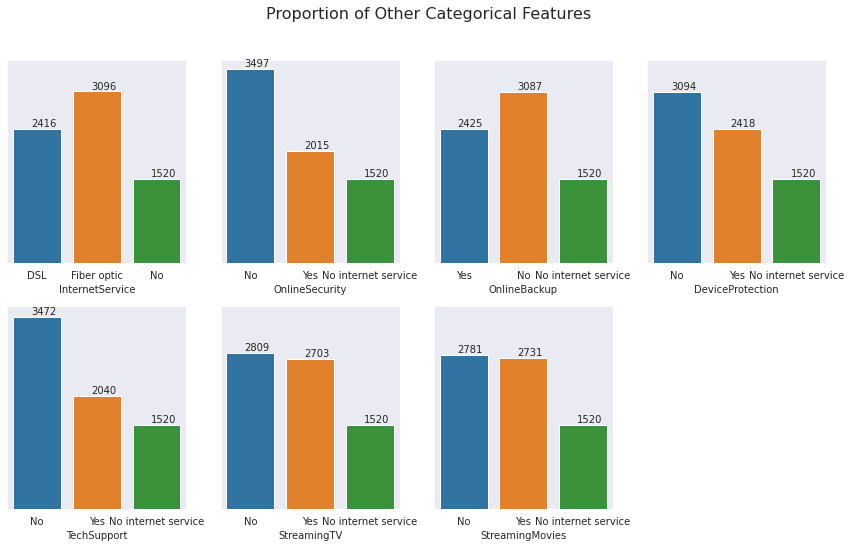

In [140]:
#Creating the Multiple Plot
fig, ax = plt.subplots(2, 4, figsize=(12, 7), sharey=True)
#Figure Title
fig.suptitle('Proportion of Other Categorical Features', fontsize=16,y=1.08)



#Column Plot [0,1]   
sns.countplot(df_clean['InternetService'], ax=ax[0,0])
x = ['Fiber optic', 'DSL', 'No']
y = [df_clean['InternetService'].value_counts().values[1], df_clean['InternetService'].value_counts().values[0],df_clean['InternetService'].value_counts().values[2]]
ax[0,0].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,0].annotate(y[i], (-0.1 + i, y[i] + j))

#column Plot [0,1]
sns.countplot(df_clean['OnlineSecurity'], ax=ax[0,1])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['OnlineSecurity'].value_counts().values[0], df_clean['OnlineSecurity'].value_counts().values[1],df_clean['OnlineSecurity'].value_counts().values[2]]
ax[0,1].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,1].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [0,2]
sns.countplot(df_clean['OnlineBackup'], ax=ax[0,2])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['OnlineBackup'].value_counts().values[1], df_clean['OnlineBackup'].value_counts().values[0],df_clean['OnlineBackup'].value_counts().values[2]]
ax[0,2].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,2].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [0,3]
sns.countplot(df_clean['DeviceProtection'], ax=ax[0,3])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['DeviceProtection'].value_counts().values[0], df_clean['DeviceProtection'].value_counts().values[1], df_clean['DeviceProtection'].value_counts().values[2]]
ax[0,3].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[0,3].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,0]
sns.countplot(df_clean['TechSupport'], ax=ax[1,0])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['TechSupport'].value_counts().values[0], df_clean['TechSupport'].value_counts().values[1], df_clean['TechSupport'].value_counts().values[2]]
#Remove y-axis
ax[1,0].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,0].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,1]
sns.countplot(df_clean['StreamingTV'], ax=ax[1,1])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['StreamingTV'].value_counts().values[0], df_clean['StreamingTV'].value_counts().values[1], df_clean['StreamingTV'].value_counts().values[2]]
#Remove y-axis
ax[1,1].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,1].annotate(y[i], (-0.1 + i, y[i] + j))

#Column Plot [1,2]
sns.countplot(df_clean['StreamingMovies'], ax=ax[1,2])
x = ['No', 'Yes', 'No internet service']
y = [df_clean['StreamingMovies'].value_counts().values[0], df_clean['StreamingMovies'].value_counts().values[1], df_clean['StreamingMovies'].value_counts().values[2]]
#Remove y-axis
ax[1,2].get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax[1,2].annotate(y[i], (-0.1 + i, y[i] + j))

#Making the last spot not visible
ax[1,3].set_visible(False)

plt.tight_layout()
plt.plot()

Das variáveis presentes acima, vemos que as variáveis `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` são opções que dependem do cliente possuir um serviço de internet. Portanto, vamos olhar isoladamente a variável `InternetService`.

In [141]:
print('\nProporção de Churn para coluna InternetService:')
print(df_clean[['InternetService','Churn']].groupby(['InternetService']).mean())


Proporção de Churn para coluna InternetService:
                    Churn
InternetService          
DSL              0.189983
Fiber optic      0.418928
No               0.074342


Essa variável nos mostra ser muito interessante para prever a taxa de Churn, pois clientes que possuem internet de fribra optica são mais propensos a largarem o serviço da empresa. No gráfico acima, vemos que não há muita diferença em clientes que optam por fibra óptica ou por DSL. Isso pode indicar um serviço de fibra óptica inferior, mas antes de tirar conclusões preciptadas, vamos ver a difenrença de preços entre os serviços. 

In [142]:
df_clean[['MonthlyCharges','InternetService']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.088017
Fiber optic,91.500129
No,21.076283


O serviço de fibra óptica é mais caro do que o DSL, isso pode ser um motivo do por que clientes de fibra óptica são mais propensos a Churn.

Vamos ver como é a proporção da Taxa de Churn com os serviços que dependem de internet.

In [143]:
print('\nProporção de Churn para coluna OnlineSecurity: ')
print(df_clean[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean())
print('\nProporção de Churn para coluna OnlineBackup: ')
print(df_clean[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean())
print('\nProporção de Churn para coluna DeviceProtection: ')
print(df_clean[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean())
print('\nProporção de Churn para coluna TechSupport: ')
print(df_clean[['TechSupport','Churn']].groupby(['TechSupport']).mean())
print('\nProporção de Churn para coluna StreamingTV: ')
print(df_clean[['StreamingTV','Churn']].groupby(['StreamingTV']).mean())
print('\nProporção de Churn para coluna StreamingMovies: ')
print(df_clean[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean())


Proporção de Churn para coluna OnlineSecurity: 
                        Churn
OnlineSecurity               
No                   0.417787
No internet service  0.074342
Yes                  0.146402

Proporção de Churn para coluna OnlineBackup: 
                        Churn
OnlineBackup                 
No                   0.399417
No internet service  0.074342
Yes                  0.215670

Proporção de Churn para coluna DeviceProtection: 
                        Churn
DeviceProtection             
No                   0.391403
No internet service  0.074342
Yes                  0.225393

Proporção de Churn para coluna TechSupport: 
                        Churn
TechSupport                  
No                   0.416475
No internet service  0.074342
Yes                  0.151961

Proporção de Churn para coluna StreamingTV: 
                        Churn
StreamingTV                  
No                   0.335351
No internet service  0.074342
Yes                  0.301147

Proporção 

###Serviço de Telefone

In [144]:
print(df_clean['MultipleLines'].value_counts())
print('\n')
print(df_clean['PhoneService'].value_counts())

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


Yes    6352
No      680
Name: PhoneService, dtype: int64


Os clientes que não possuem serviço de telefone, claramente não vão ter multiplas linhas. Note também que a resposta *No* da coluna `MultipleLines` representa os clientes que possuem apenas uma linha telefonica. Portanto, a coluna `MultipleLines` engloba a coluna `PhoneService` e ainda apresenta mais detalhes. Vamos retirar a coluna `PhoneService`, pois ela não irá agregar em nosso modelo.

In [145]:
#Dropping PhoneService Column
df_clean.drop('PhoneService', axis=1, inplace=True)

In [146]:
#Churn Proportion 
print('\nProporção de Churn para coluna MultipleLines:')
print(df_clean[['MultipleLines','Churn']].groupby(['MultipleLines']).mean())


Proporção de Churn para coluna MultipleLines:
                     Churn
MultipleLines             
No                0.250812
No phone service  0.250000
Yes               0.286485


As respostas da coluna mostram uma taxa de Churn muito próximas, mas irei manter a variável no nosso modelo. 



###Contrato e Pagamento

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


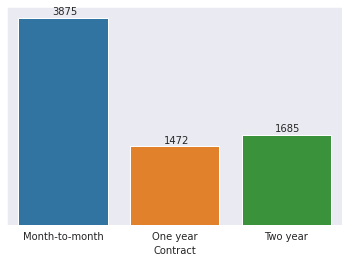

In [147]:
fig, ax = plt.subplots()
sns.countplot(df_clean['Contract']);
x = ['Month-to-month', 'One Year Contract', 'Two Year']
y = [df_clean['Contract'].value_counts().values[0], df_clean['Contract'].value_counts().values[2],df_clean['Contract'].value_counts().values[1]]
ax.get_yaxis().set_visible(False)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax.annotate(y[i], (-0.1 + i, y[i] + j))
plt.show()

In [148]:
#Churn rate for contract features
df_clean[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


Vemos que clientes com contratos de curto prazo são mais propensos a largarem o serviço. Portanto, vemos o motivo do qual muitas empresas costumam fazer ofertas mais em contas a contratos a longo prazo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


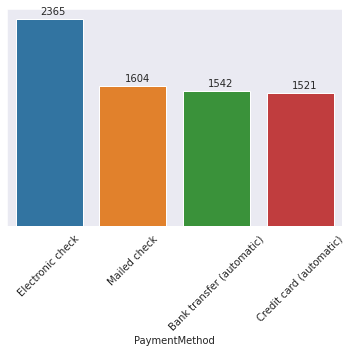

In [149]:
fig, ax = plt.subplots()
sns.countplot(df_clean['PaymentMethod']);
x = ['Electronic check', 'Mailed check', 'nk transfer (automatic)','Credit card (automatic)']
y = [df_clean['PaymentMethod'].value_counts().values[0], df_clean['PaymentMethod'].value_counts().values[1],df_clean['PaymentMethod'].value_counts().values[2],df_clean['PaymentMethod'].value_counts().values[3]]
ax.get_yaxis().set_visible(False)
plt.xticks(rotation=45)
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    ax.annotate(y[i], (-0.1 + i, y[i] + j))
plt.show()

In [150]:
#Churn Rate for Payment
df_clean[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167315
Credit card (automatic),0.152531
Electronic check,0.452854
Mailed check,0.192020


Podemos ver que a maioria dos clientes efetua pagamento em check, que também são os clientes mais propensos a largarem o serviço. Portanto pode ser feita uma análise mais aprofundada para saber se os clientes que pagam com check tem relação com alguma outra variável presente e tentar fazer algum plano para esse cliente permanecer na empresa. 

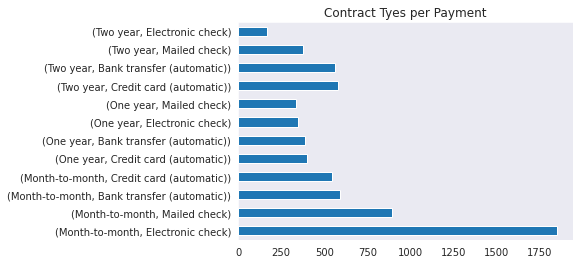

In [151]:
df_clean.groupby(['Contract'])['PaymentMethod'].value_counts().plot(kind='barh');
plt.ylabel('');
plt.title('Contract Tyes per Payment');
plt.show();

Ao olharmos os tipos de pagamentos em relação aos contratos, vemos que clientes que optam por contratos de curto prazo costumam, em sua maioria, pagar em check. Portanto, a empresa pode identificar esses clientes e tentar fazer uma boa oferta para ficarem a longo prazo.

Vamos agora tentar identificar se quanto maior o tempo do cliente na empresa, será menor as chances dele cometer Churn.

In [152]:
#The average tenure in months for people who left the company
df_clean[['tenure','Churn']].groupby(['Churn']).mean()

,tenure
Churn,
0,37.650010
1,17.979133


Vemos que a média de clientes que deixam a empresa são aproximadamente 20 meses menos do que pessoas que costumam ficar. O que mostra que quanto maior o tempo de um cliente na empresa, menor as chances dele cometer Churn. Também observamos isso na coluna `Contract`, onde clientes com contratos a longo prazo, tem menos chance de cometer Churn. Mas falta confirmar se os clientes com contratos a longo prazo, são os que possuem a maior tenure.

In [153]:
df_clean[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.073370
Two year,57.071810


Como esperado, clientes com contratos a longo prazo, tem maior grau de fidelidade com a empresa do que clientes com contratos a curto prazo. Essas duas variáveis, estão altamente correlacionadas. Portanto, manter a variável `Contract` vai adicionar pouca informação para a identificação de Churn do nosso modelo. 

In [154]:
df_clean.drop('Contract', axis=1, inplace=True)

Note como essa fase de análise exploratória é muito importante, através dela, conseguimos identificar variáveis que agregam pouca informação para o modelo. Logo, é desnecessário incluir todas as variáveis no modelo. Adicionando variáveis não necessarias, podemos aumentar a complexidade do modelo, pois modelos complexos tendem a overfit e não generalizar bem para novas variáveis. Retirarmos algumas variáveis do nosso dataset. 

* `Contract`
* `CustomerID`
* `PhoneService`
* `TotalCharges`
* `Gender`

Agora que finalizamos esse processo, podemos começar a trabalhar no nosso modelo de machine learning.

# Preparando os Dados

##Variáveis Categóricas

Quando lidamos com variáveis categoricas, precisamos transformá-las em variáveis numéricas antes de treinarmos nosso modelo de Machine Learning. Temos que ter um cuidado ao fazer essa transformação, pois ao transformar as variáveis, um número sera designado a cada categoria e dessa forma, a categoria com números maiores, será considerada mais importante. Como estamos lidando em maioria com variáveis categóricas não binárias, temos que tomar cuidado para isso não ocorrer. Dessa forma, iremos transformar as variáveis de forma que cada categoria será representada por uma coluna com valores 0's ou 1's.






In [155]:
#Data pre-processing
#Putting all binary columns in a lis
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
print('Todas variáveis binarias:', binary_var)
#Putting all Numerical Variables in a list different of binary (senior column is numerico and binary)
num_var = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary_var]
print('\nTodas variáveis Numéricas não binárias:', num_var)
#Non binary variables
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]
print('\nTodas variáveis Categóricas ão binárias:', cat_var)



Todas variáveis binarias: ['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']

Todas variáveis Numéricas não binárias: ['tenure', 'MonthlyCharges']

Todas variáveis Categóricas ão binárias: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


Para transformar as variáveis categóricas binárias vamos importar do sklearn o `LabelEnconder`.

In [156]:
#Import Library
from sklearn.preprocessing import LabelEncoder
#Creating a new Copy of the DataFrame
df_proc = df_clean.copy()
le = LabelEncoder()
#Label Enconding for Binary Variables
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])


Vamos agora usar o método `get_dummies` do pandas (Também poderia ser feito usando o `OneHotEnconder` do Sklearn) para transformar as variáveis categóricas não binárias em colunas de 0's e 1's. 


In [157]:
# Encoding for categorical columns with multiple classes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

Também precisamos *padronizar* as variáveis ​​contínuas. Caso contrário, as variáveis ​​com valores mais altos terão mais importância, o que afeta a precisão do modelo.

In [158]:
#Scaling continuous variables
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in num_var:
  df_proc[i] = sc.fit_transform(df_proc[[i]]) '''

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nfor i in num_var:\n  df_proc[i] = sc.fit_transform(df_proc[[i]]) '

In [159]:
#Showing the new data
print(df_proc.shape)
df_proc.head()

(7032, 35)


,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [160]:
''' #Importing the resample library
from sklearn.utils import resample

# Separate majority and minority classes
df_proc_majority = df_proc[df_proc.Churn==0]
df_proc_minority = df_proc[df_proc.Churn==1]
 
# Upsample minority class
df_proc_minority_upsampled = resample(df_proc_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5163,    # to match majority class
                                 random_state=123) # reproducible results (seed)
 
# Combine majority class with upsampled minority class
df_proc_upsampled = pd.concat([df_proc_majority, df_proc_minority_upsampled])
'''

' #Importing the resample library\nfrom sklearn.utils import resample\n\n# Separate majority and minority classes\ndf_proc_majority = df_proc[df_proc.Churn==0]\ndf_proc_minority = df_proc[df_proc.Churn==1]\n \n# Upsample minority class\ndf_proc_minority_upsampled = resample(df_proc_minority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=5163,    # to match majority class\n                                 random_state=123) # reproducible results (seed)\n \n# Combine majority class with upsampled minority class\ndf_proc_upsampled = pd.concat([df_proc_majority, df_proc_minority_upsampled])\n'

In [161]:
'''#Proporção de Churn na empresa
x = ['No', 'Yes']
y = [df_proc_upsampled['Churn'].value_counts().values[0], df_proc_upsampled['Churn'].value_counts().values[1]]
fig, ax = plt.subplots()
#ax = plt.gca()
ax.set_xlabel('Churn')
#Deixar o eixo y invisivel 
ax.get_yaxis().set_visible(False)
ttl = ax.title
ttl.set_position([.5, 1.05])
#plt.draw()
sns.countplot(df_proc_upsampled['Churn'], ax=ax)
ax.set_title('Proportion of Customers who Left the Service')
# This is the location for the annotated text
i = 1
j = 50
# Annotating the bar plot with the values (total death count)
for i in range(len(x)):
    plt.annotate(y[i], (-0.1 + i, y[i] + j))


plt.plot();
'''

"#Proporção de Churn na empresa\nx = ['No', 'Yes']\ny = [df_proc_upsampled['Churn'].value_counts().values[0], df_proc_upsampled['Churn'].value_counts().values[1]]\nfig, ax = plt.subplots()\n#ax = plt.gca()\nax.set_xlabel('Churn')\n#Deixar o eixo y invisivel \nax.get_yaxis().set_visible(False)\nttl = ax.title\nttl.set_position([.5, 1.05])\n#plt.draw()\nsns.countplot(df_proc_upsampled['Churn'], ax=ax)\nax.set_title('Proportion of Customers who Left the Service')\n# This is the location for the annotated text\ni = 1\nj = 50\n# Annotating the bar plot with the values (total death count)\nfor i in range(len(x)):\n    plt.annotate(y[i], (-0.1 + i, y[i] + j))\n\n\nplt.plot();\n"

#Modelo de Machine Learning

Com o processamento realizado na etapa anterior, os dados já podem ser usados nos modelos de machine learning.

A primeira coisa que temos que fazer no nosso modelo de machine learning é separar as variáveis entre variáveis de treino e variavéis de teste.

In [162]:
#Importing the traing test split library
from sklearn.model_selection import train_test_split
X = df_proc.drop('Churn', axis = 1)
y = df_proc['Churn']

#Traing and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

Para essa etapa, iremos criar um projeto simples, aonde iremos comparar diferentes comparar o desempenho de alguns modelos de machine learning e após isso focar em um modelo e melhorar ele com o uso de hiperparámetros. No momento não será feito nenhum ajuste nos hiperparâmetros e faremos o balanceamento de dados, feature engineering ou feature selection (entre outros) em nosso conjunto de treino, para tentar não inviesar o nossos dados de teste. Os dados de testes tem que se parecer o máximo possível com dados reais.

Vamos criar uma função, que irá ter como entrada os dados de treino `X_train` e `y_train` e um modelo classificador do Scikit-Learn. Nessa função, iremos aplicar [cross validation](https://towardsdatascience.com/cross-validation-430d9a5fee22) de forma que dentro dos dados de treino, não seja aplicado nenhuma transformação nos dados de validação e simular uma condição onde nosso modelo de machine learning nunca tenha visto esse subconjunto. Essa etapa de padronização ou qualquer outra de pré-processamento, pode ser estruturada com um [pipeline](https://scikit-learn.org/stable/modules/compose.html#combining-estimators), aonde podemos aplicar feature selection, normalization and classification no conjunto de treino deixando o conjunto de validação sem ser alterado em cada etapa.

In [163]:
def val_model(X, y, clf, quite=False):
    
    #quite: bool, indicando se a função deve imprimir os resultados ou não.
    # Returns :float, média dos scores da cross-validation.
    # clf: modelo de classificação
    
    X = np.array(X)
    y = np.array(y)

    #creating a pipeline and performing standardization in the cross validation
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

Vamos aplicar a pipeline acima no modelo de classificação *Random Forest* e imprimir a média do recal que recebemos da função criada acima. Lembrando que a métrica de avaliação do modelo fica a sua escolha. Estou usando Recall, pois ele preve o número de churns previstos corretamente. 

In [164]:
# criar baseline e ver desempenho
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)


Recall: 0.47 (+/- 0.03)


Agora temos um ponto de partida para comparar se os ajustes melhoram ou pioram o desempenho do modelo. O Recall acima é bastante condizente com os dados atuais, pois não balanceamos os nossos dados, o que faz o modelo acusar muitos falsos negativos. Agora iremos aplicar o balanceamento e fazer a padronização dos dados de treino usando o método *undersampling* e *StandardScaler*. Aplicamos no nossos dados de treino para manter os dados de teste os mais próximos possivel de dados novos que a empresa irá receber.

Optei por usar o undersampling, pois ele acaba gerando um maior número de falsos positivos (onde um cliente que não é churn é classificado como churn) e a consequência disso pode acabar sendo oferecer uma promoção a um cliente que não iria largar a empresa, mas isso é algo a ser analisado e trabalhado de forma mais complexa numa situação real. 



In [178]:
#importing librarys
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
#  padronizar os  dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

from imblearn.over_sampling import SMOTE
# Para quem quiser, pesquisa sobre SMOTE
oversample = SMOTE()
X_train_rus, y_train_rus = oversample.fit_sample(X_train, y_train)


#balancear os dados

#rus = RandomUnderSampler()
#X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

* Random Forest
* Decision Tree
* SVC
* Regressão Logística


In [179]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, svc, lr, xgb):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.844265
DecisionTreeClassifier,0.777562
SVC,0.830173
LogisticRegression,0.779430
XGBClassifier,0.841652


In [180]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [181]:
xgb = XGBClassifier(learning_rate=0.1)

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8566101185187212 para {'n_estimators': 100}


Com o número de estimadores igual a 100, realizarei a busca pelos parâmtros `max_depth` e `min_child_weight`.

In [182]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100)

param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8626290104301942 para {'max_depth': 3, 'min_child_weight': 2}


Obtidos os valores de `max_depth=3` e `min_child_weight=2`, irei otimizar o parâmetro `gamma`.

In [183]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, min_child_weight=2)

param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8587057263543532 para {'gamma': 0.4}


Por fim, obtido `gamma=0.4`, vou testar quatro valores para a `learning_rate` e ver qual oferece o melhor resultado.

In [187]:
xgb = XGBClassifier(n_estimators=100, max_depth=3, min_child_weight=2, gamma=0.4)

param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_rus, y_train_rus)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8542622995639277 para {'learning_rate': 0.1}


Fato é que uma taxa de aprendizado menor, conseguiu melhorar o desempenho do modelo XGBoost, considerando recall como sendo a única métrica de importância.

Agora, treina-se o modelo em cima do dataset de treino completo, e verifica-se o desempenho final em cima dos dados de teste, no seu primeiro contato com esse sub-conjunto que havia sido preservado.

              precision    recall  f1-score   support

           0       0.93      0.43      0.59      1341
           1       0.33      0.89      0.48       417

    accuracy                           0.54      1758
   macro avg       0.63      0.66      0.53      1758
weighted avg       0.79      0.54      0.56      1758

AUC: 0.6613



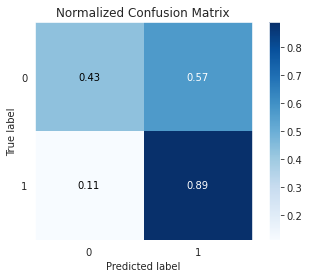

In [188]:
# modelo final
xgb = XGBClassifier(learning_rate=0.1 , n_estimators=100, max_depth=3, min_child_weight=2, gamma=0.4)
xgb.fit(X_train_rus, y_train_rus)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Depois de executar os algoritmos no conjunto de teste, temos uma exibição de como o desempenho do modelo pode ser melhorado quando ajustamos alguns parâmetros. Os três modelos tiveram ganhos na taxa de recall após o ajuste, com o XGBoost apresentando a melhor taxa de recall entre eles.



#Conclusão

O objetivo deste projeto era desenvolver um modelo que pudesse determinar a taxa de churn de clientes de uma empresa de telecomunicações da forma mais eficiente possível.

Na nossa análise exploratória, vimos alguns indicadores que possam levar clientes nessa empresa a cometer churn. Também vimos como identificar variáveis que não agregam ao modelo.

Pela matriz de confusão, obtemos um recall de 89%, isso indica que nosso modelo previu corretamente 89% dos clientes que iam cometer Churn. Porém estamos lidando uma uma taxa consideravelmente alta de falsos positivos, cerca de 57%, isso indica que 57% dos clientes que foram taxados como chrun, na verdade não eram. Isso acarreta numa quantidade alta de promoções sendo oferecidas a clientes. Portanto o recall, por mais que seja uma métrica de muita importância nesse modelo, não é a única que deve ser levada em conta. Num caso real a equipe deveria conversar sobre as possíveis aproximações para o problema em prol de mandar promoções apenas para os clientes que realmente iriam cometer Churn.